In [22]:
from seismic.monitor.dv import read_dv

dvs = read_dv('../time_shift_estimates_2018_1.0-2.0/*B203*')

/home/pm/Documents/SeisMIC/src/seismic/monitor/monitor.py:1070: RuntimeWarning: Mean of empty slice
  av_sim_mat = np.nanmean([dv.sim_mat for dv in dv_use], axis=0)
/home/pm/Documents/SeisMIC/src/seismic/monitor/monitor.py:1073: RuntimeWarning: All-NaN slice encountered
  corr = np.nanmax(av_sim_mat, axis=1)


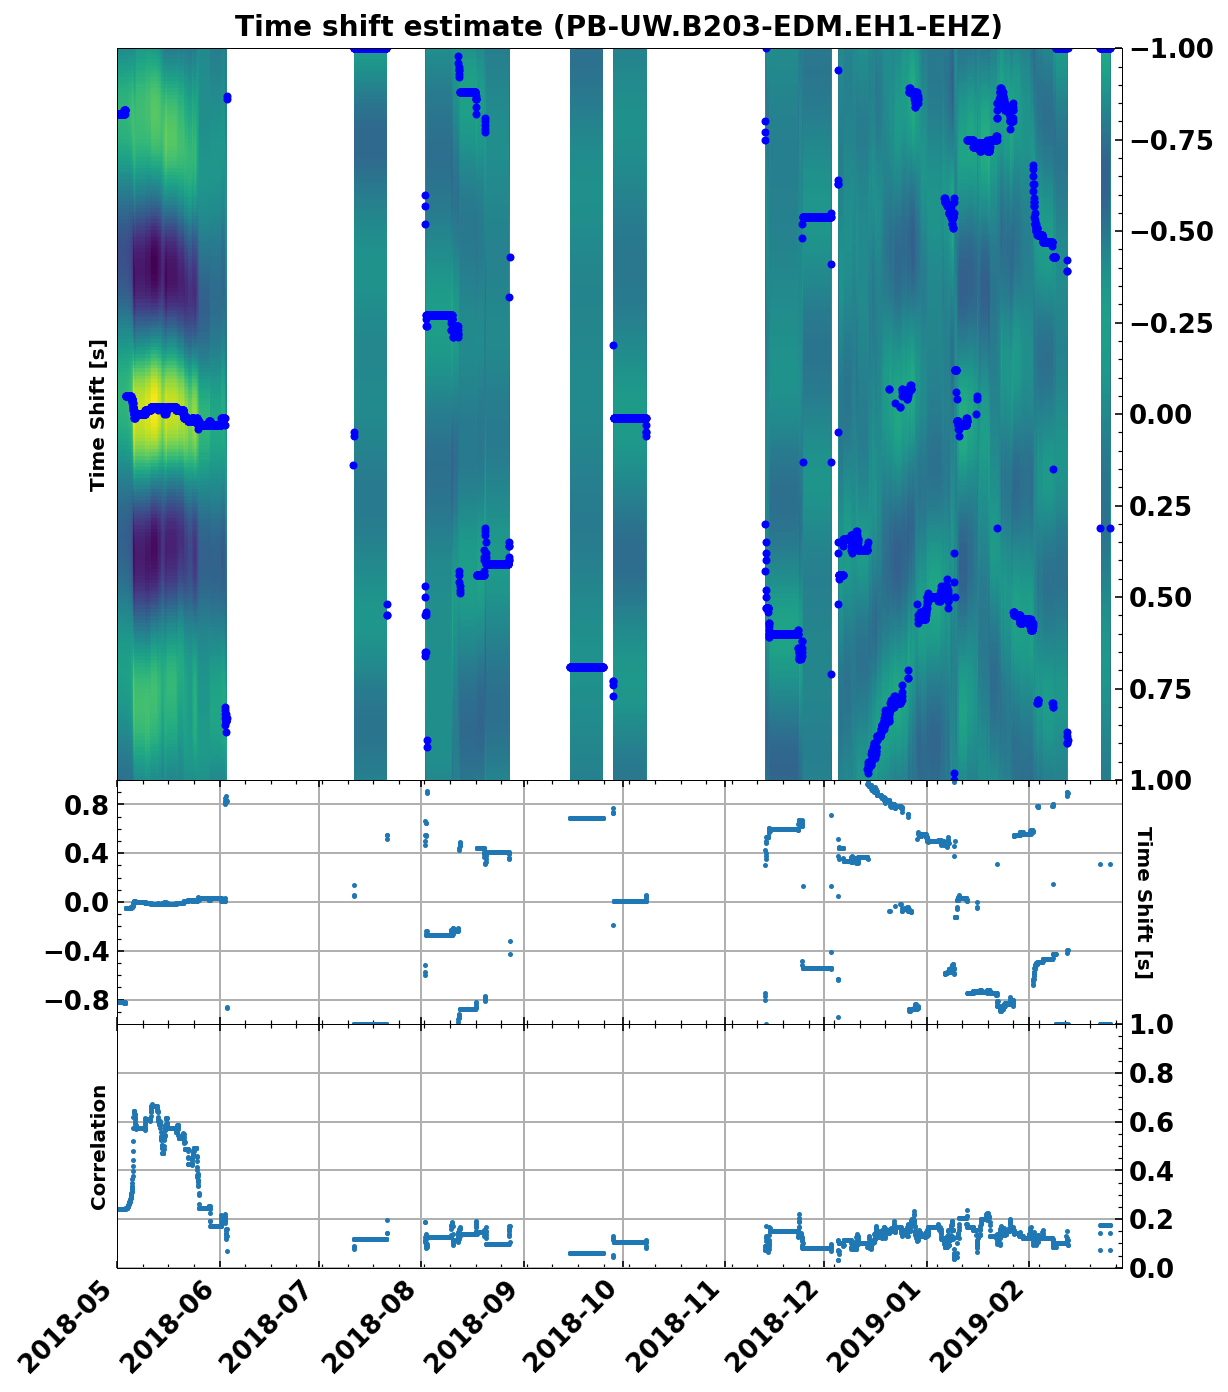

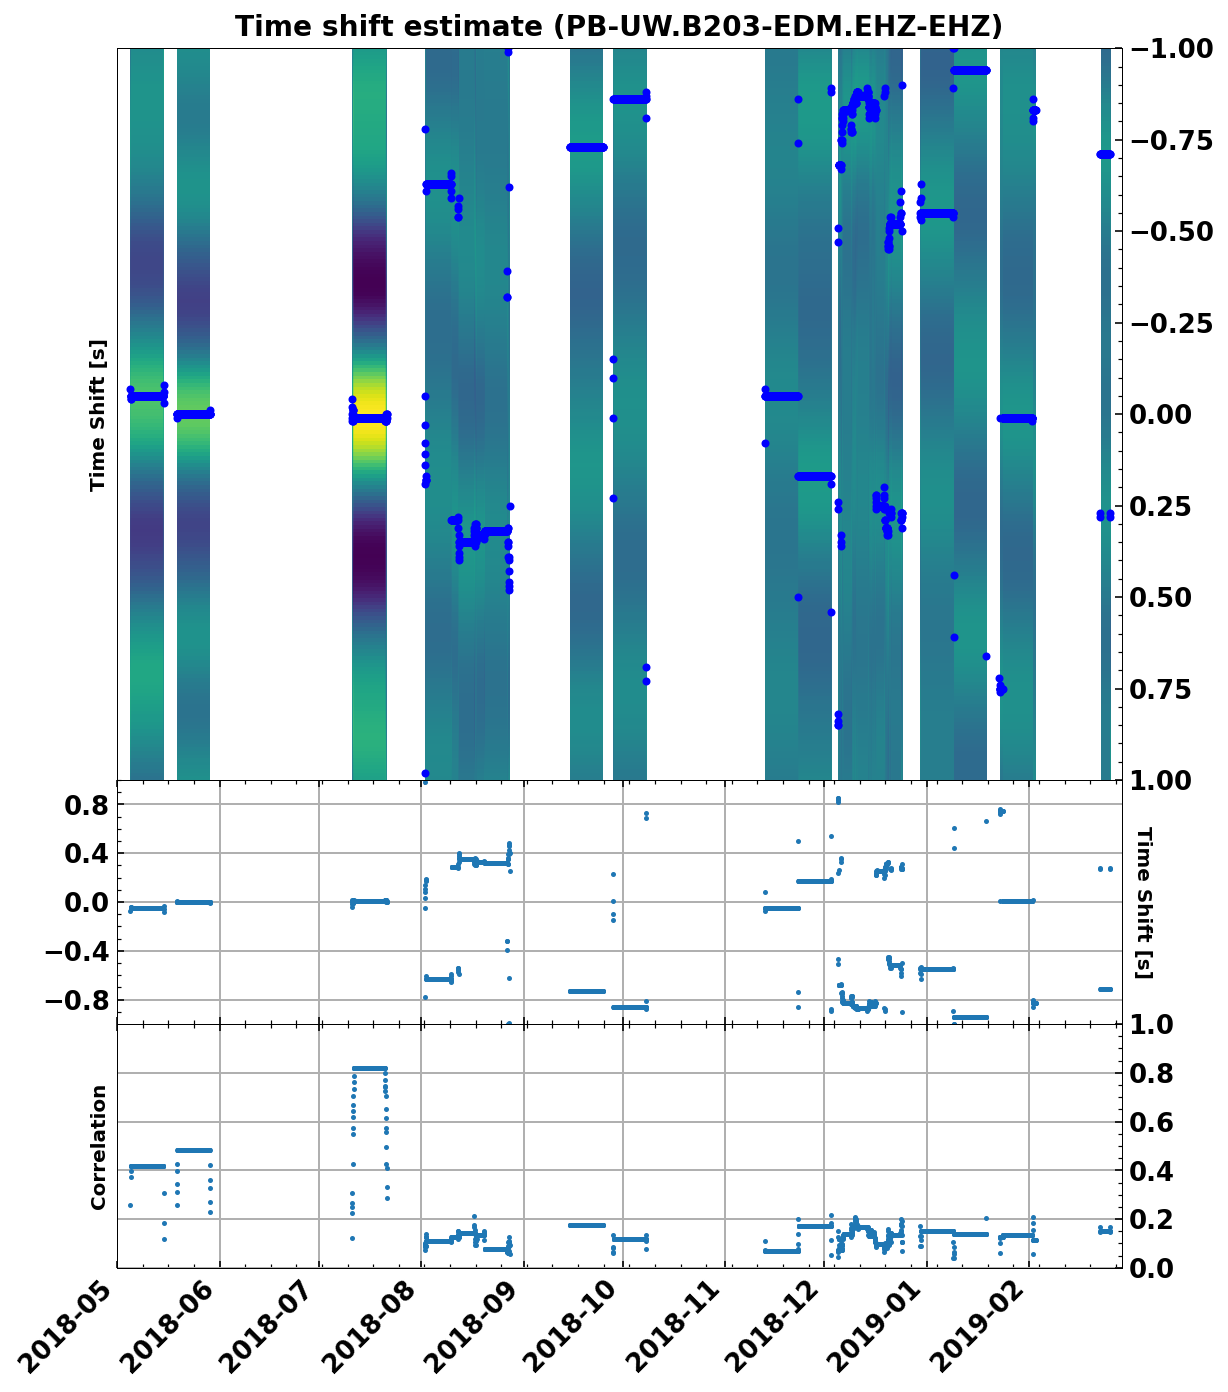

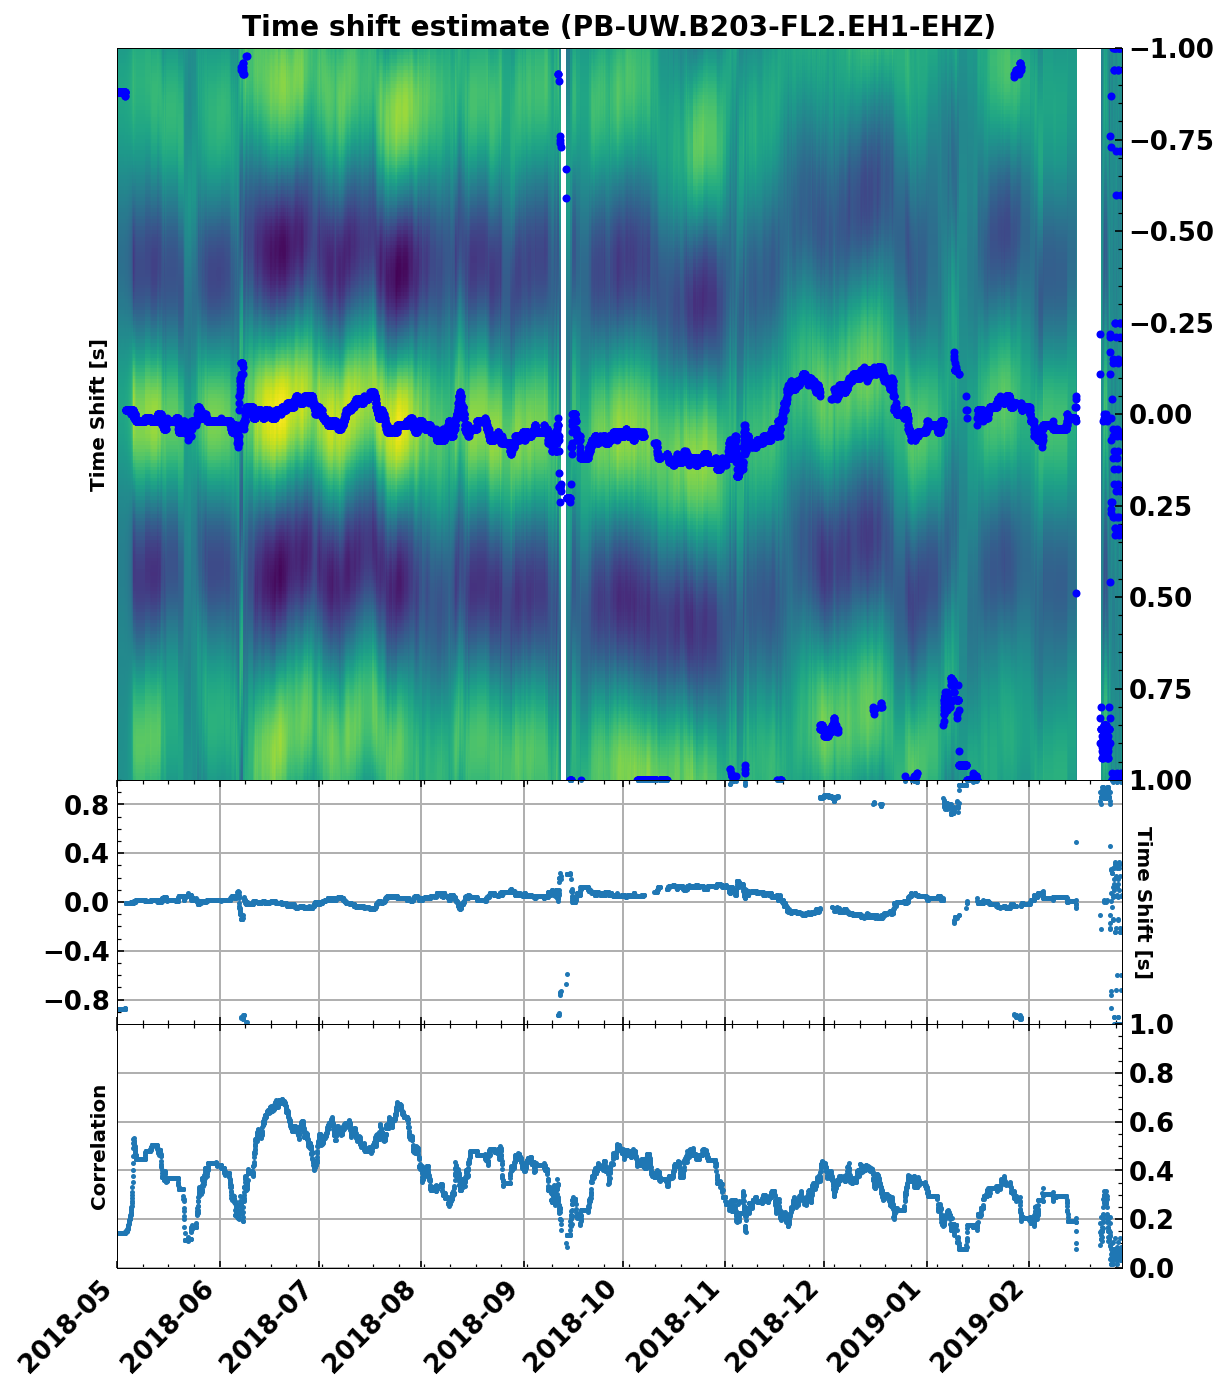

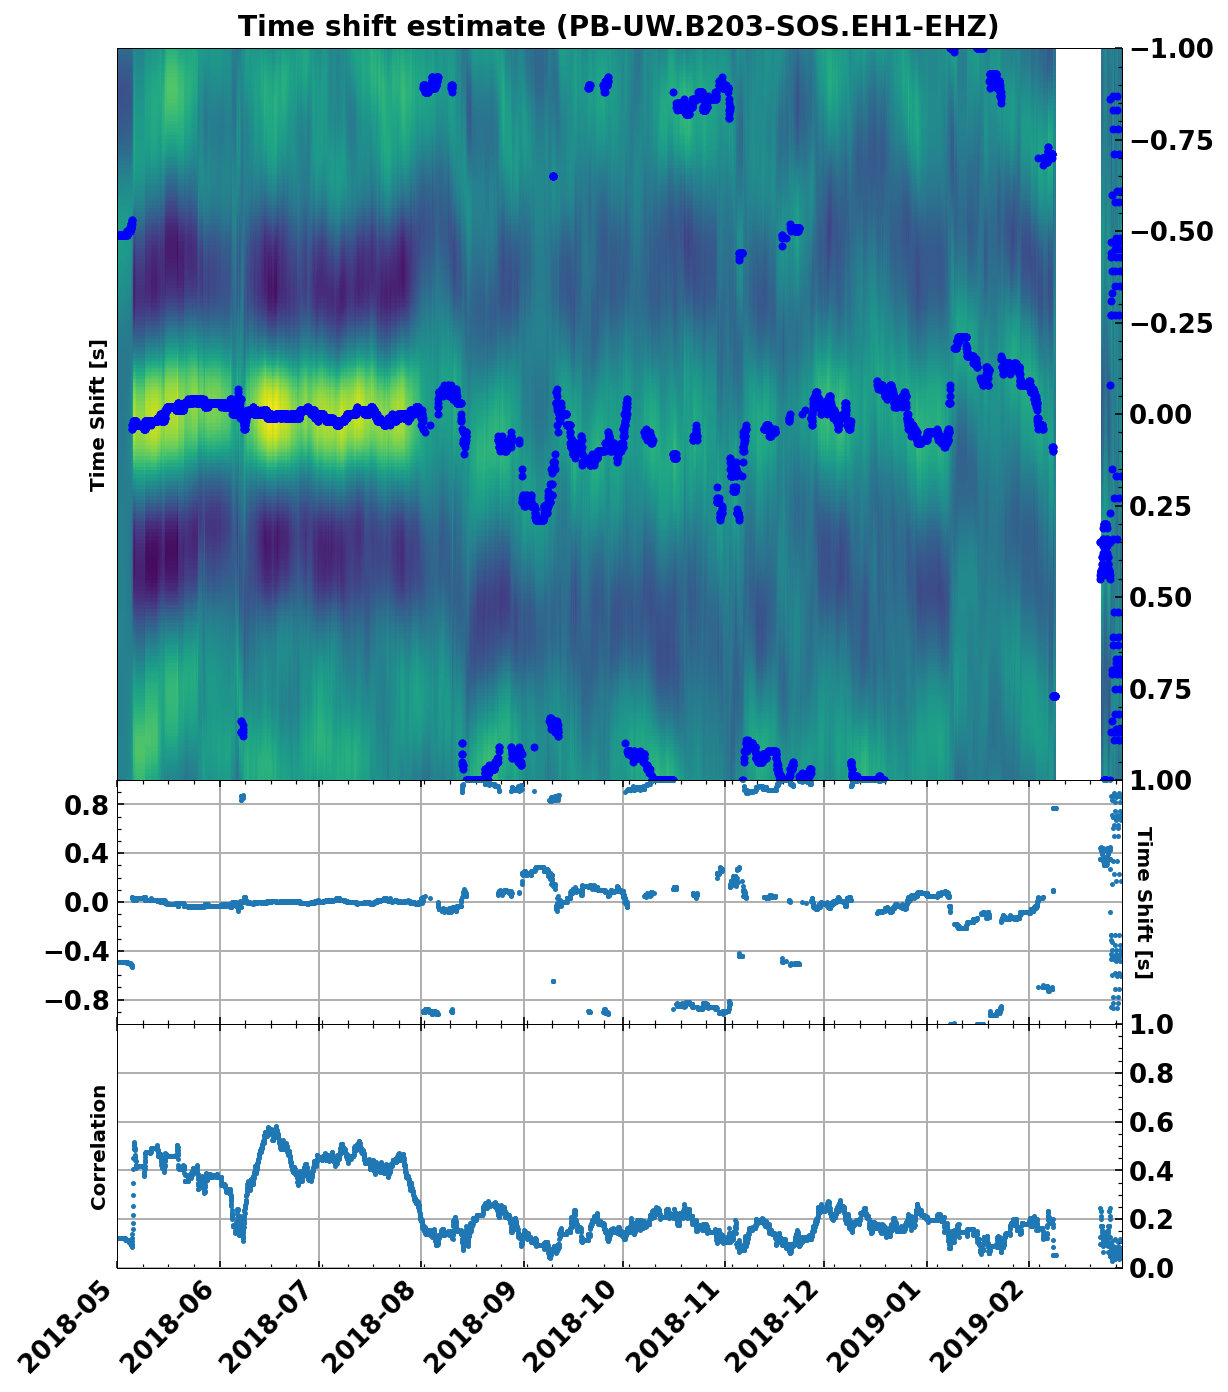

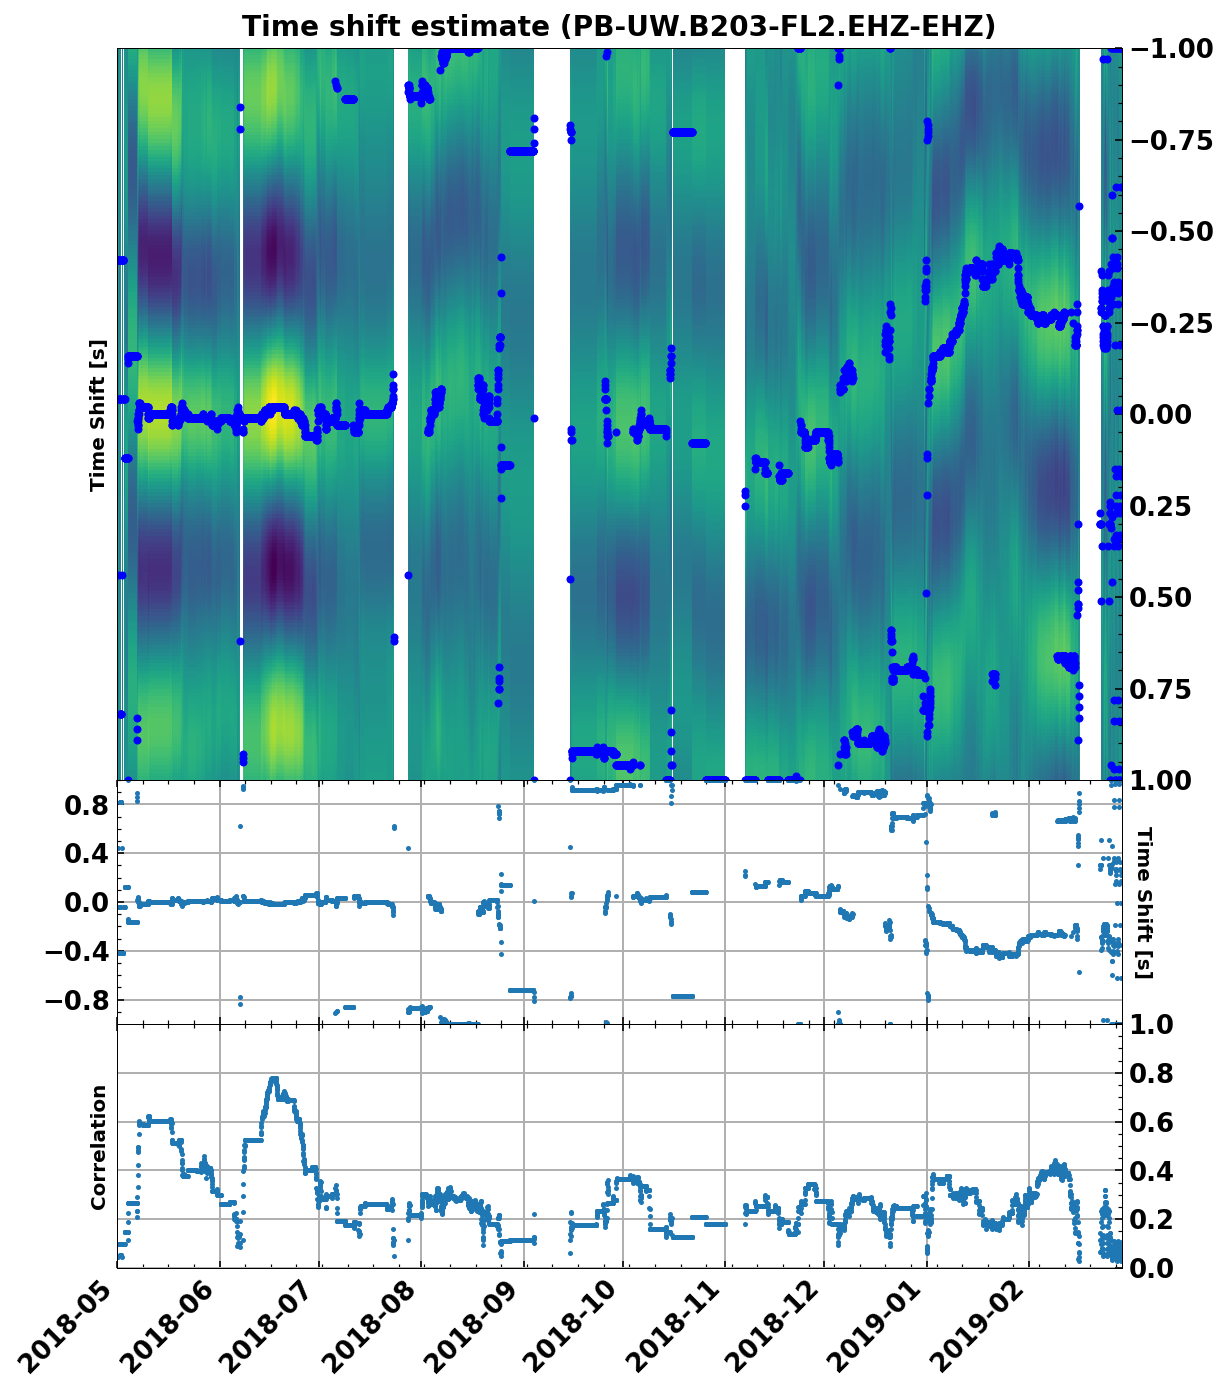

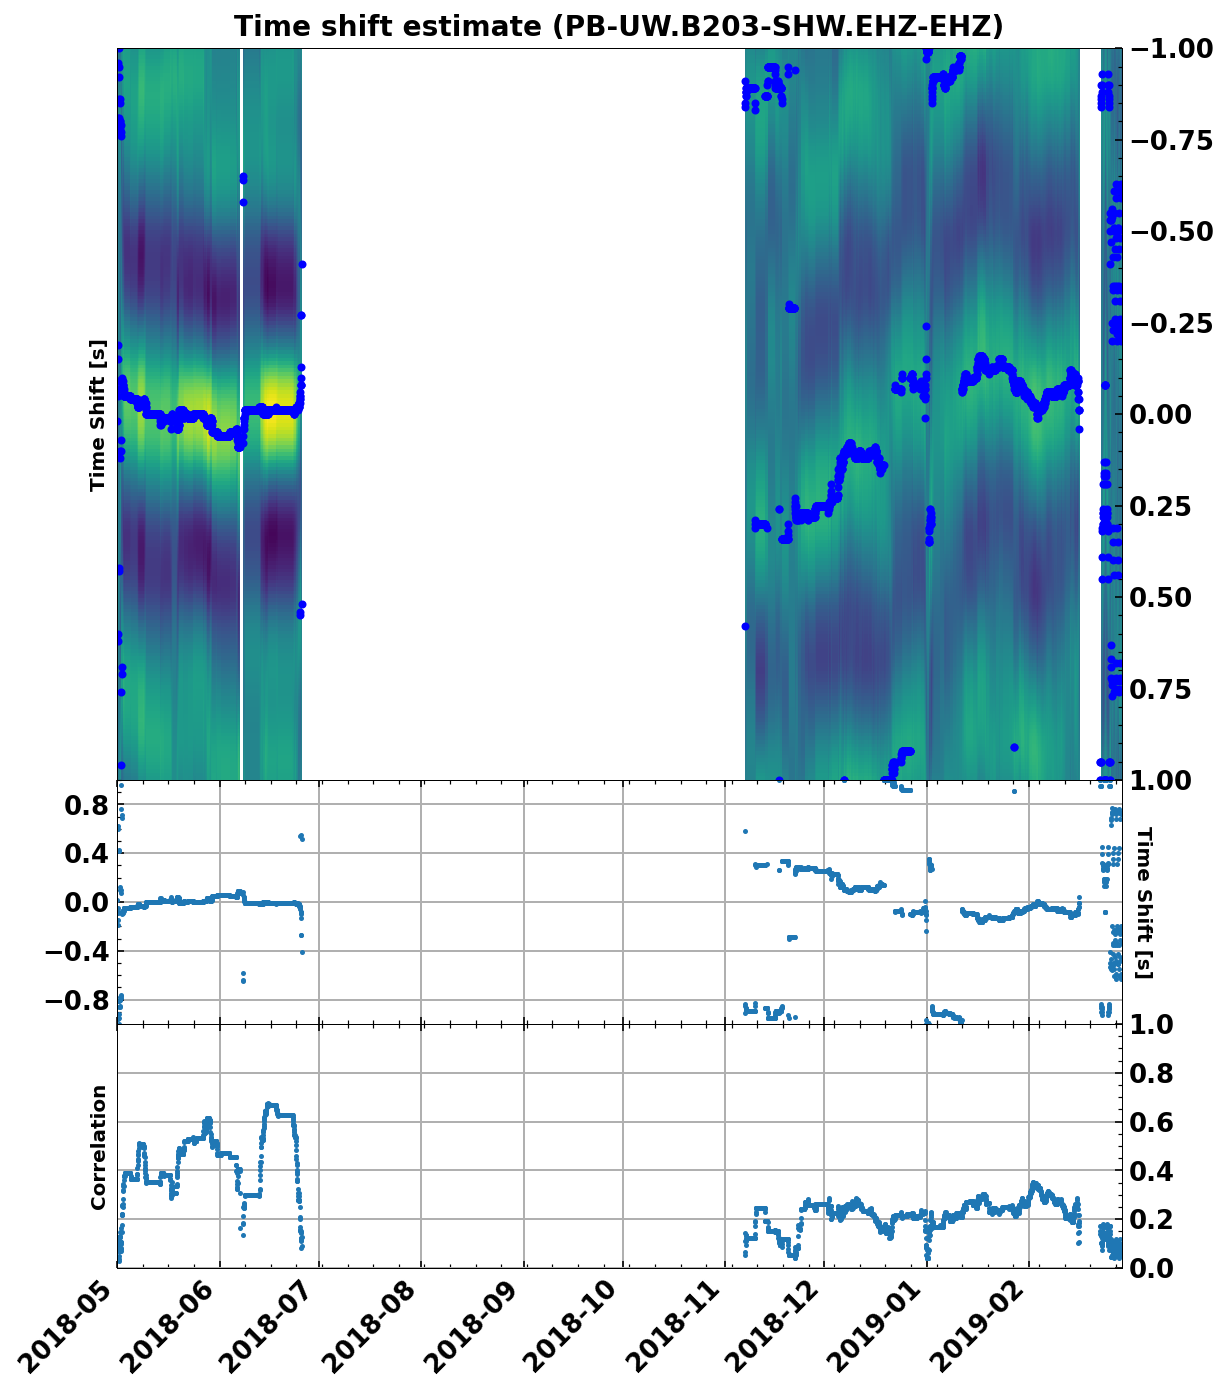

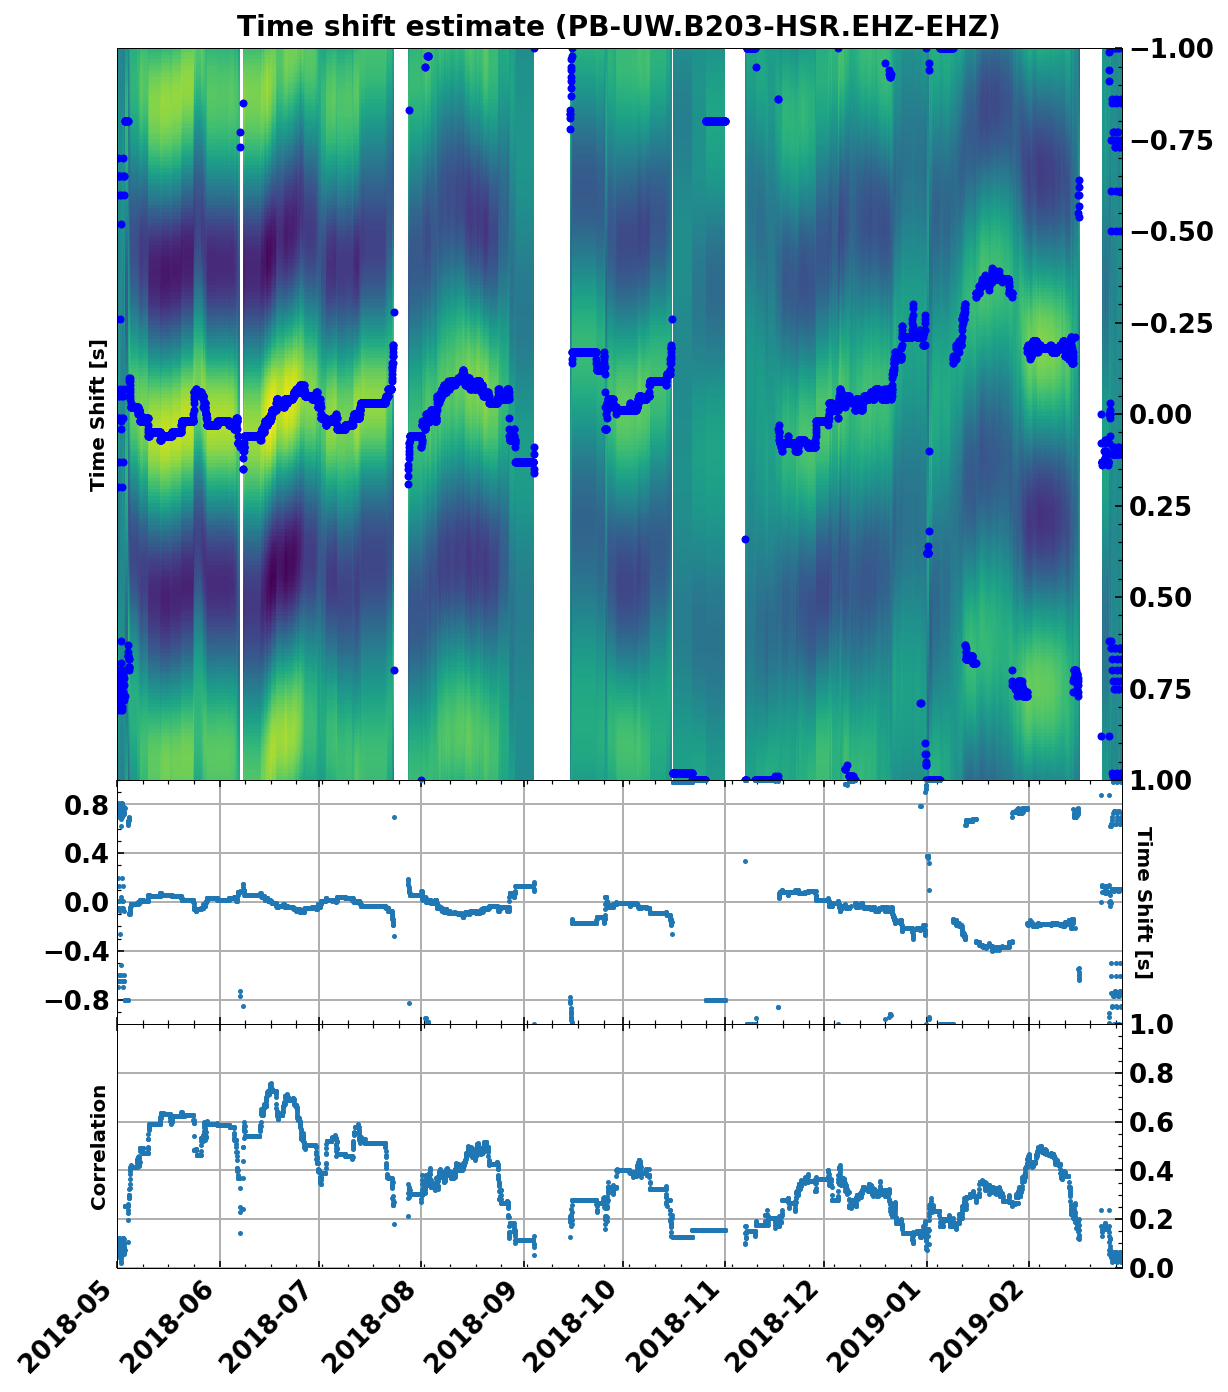

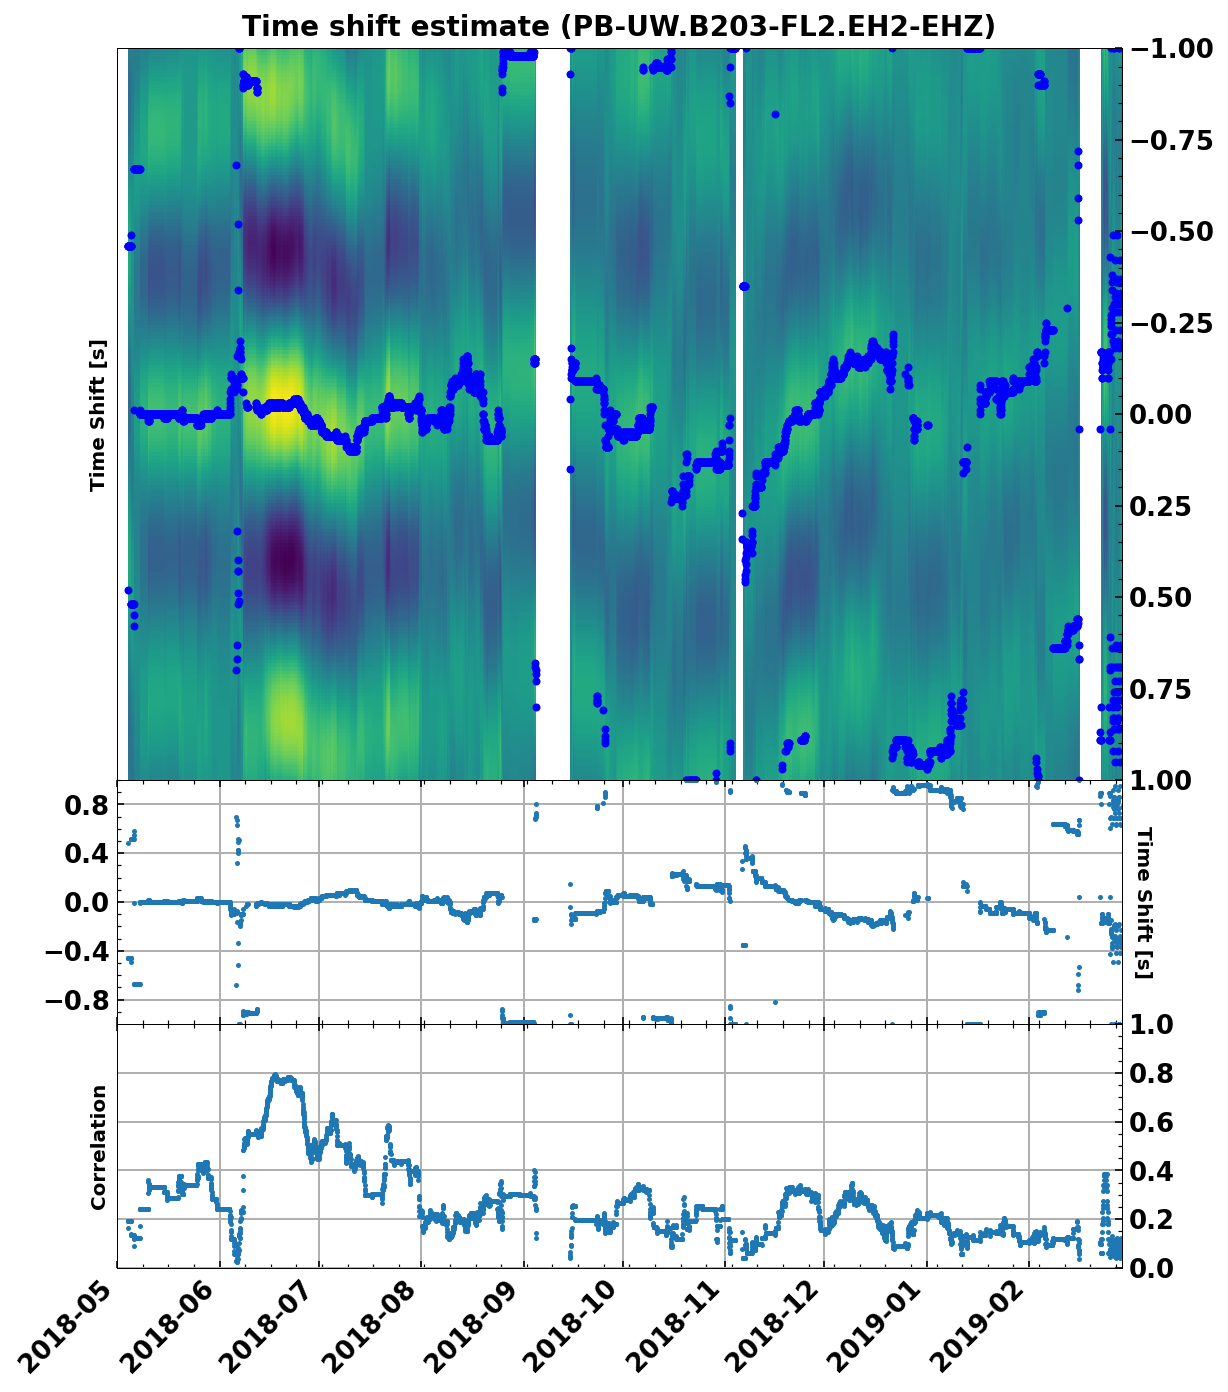

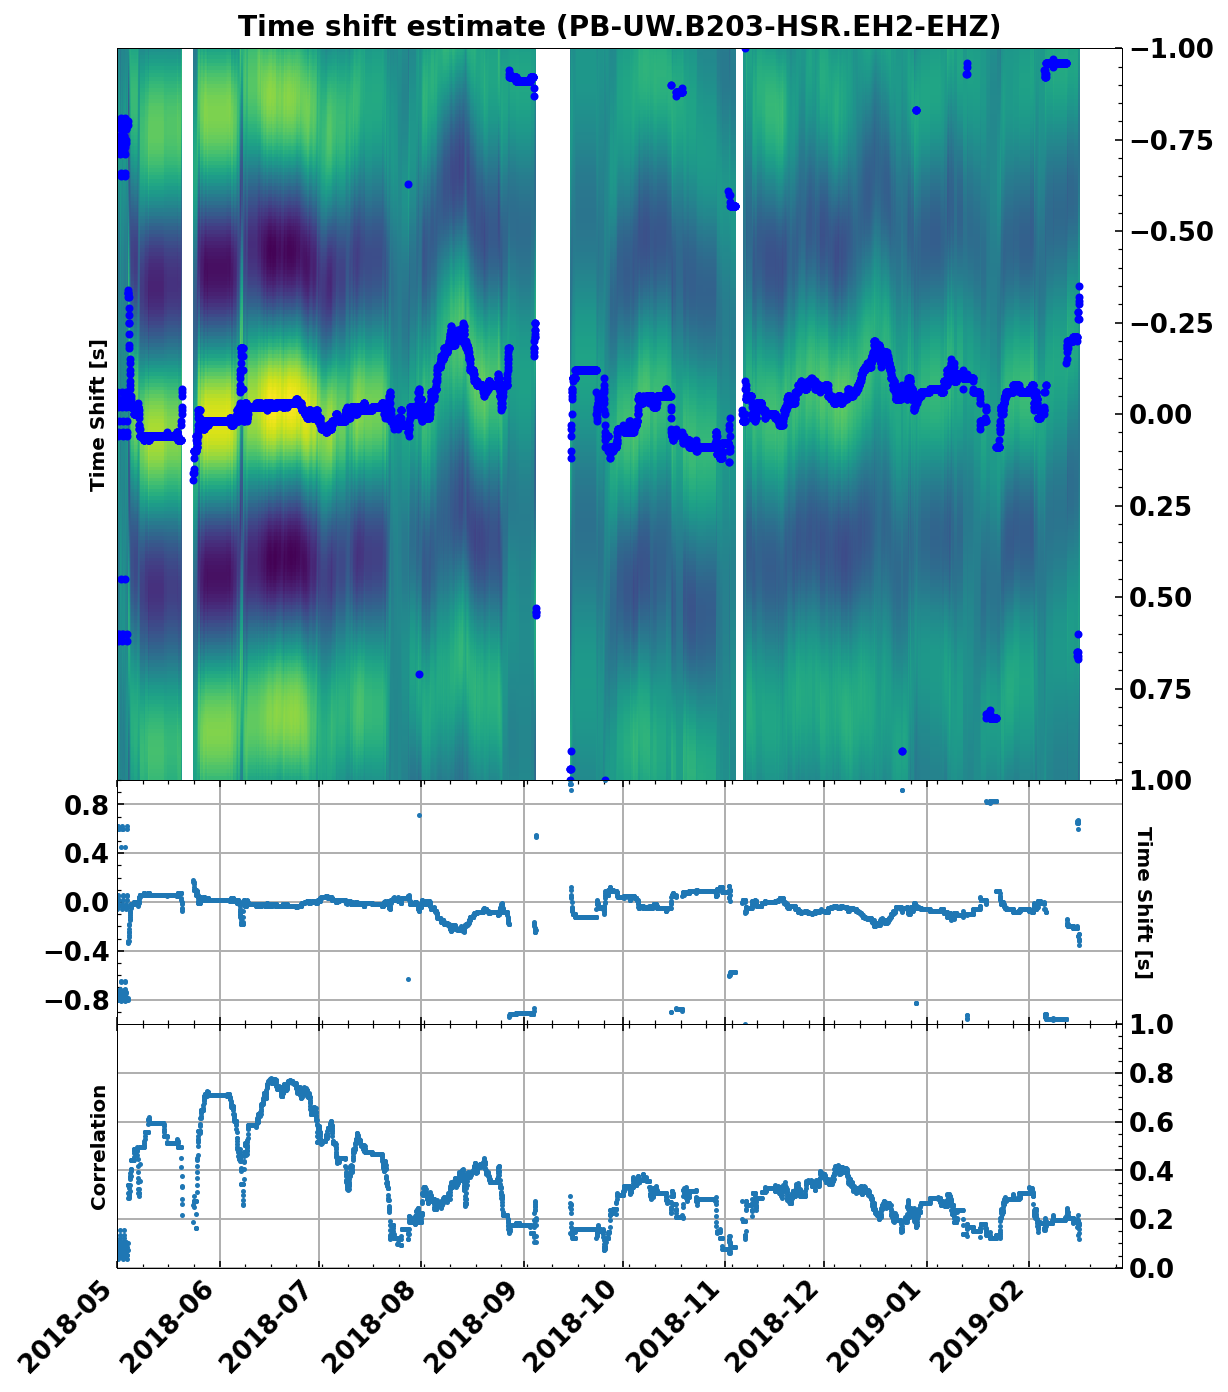

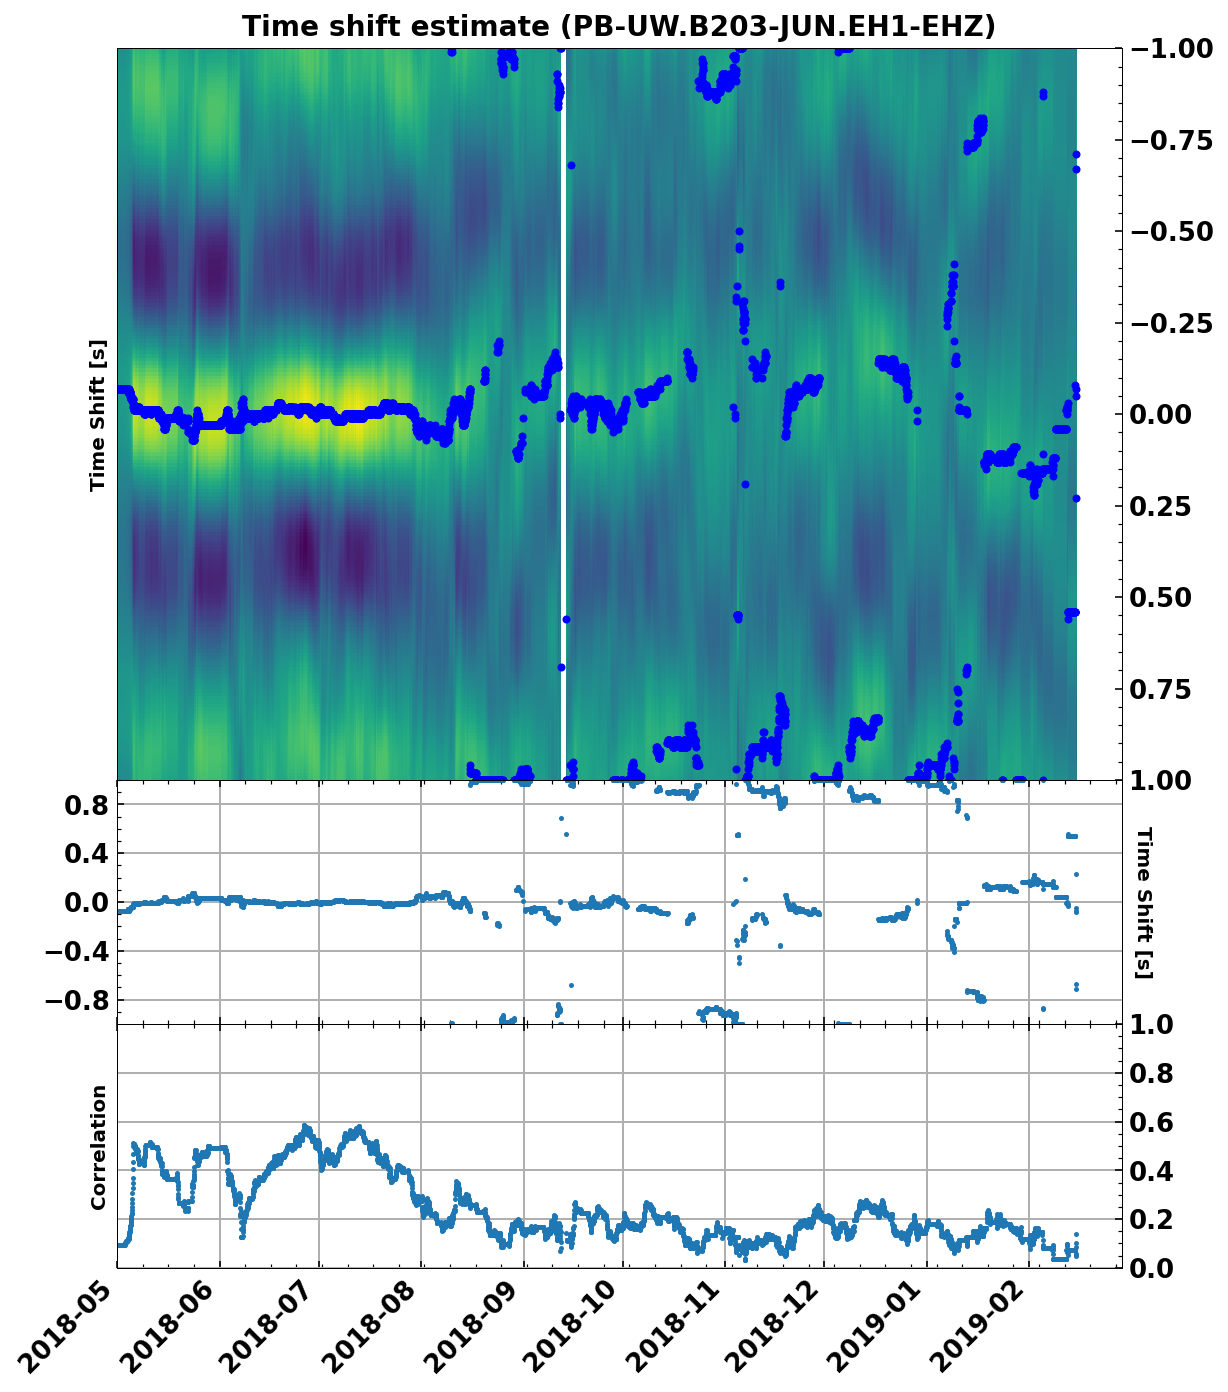

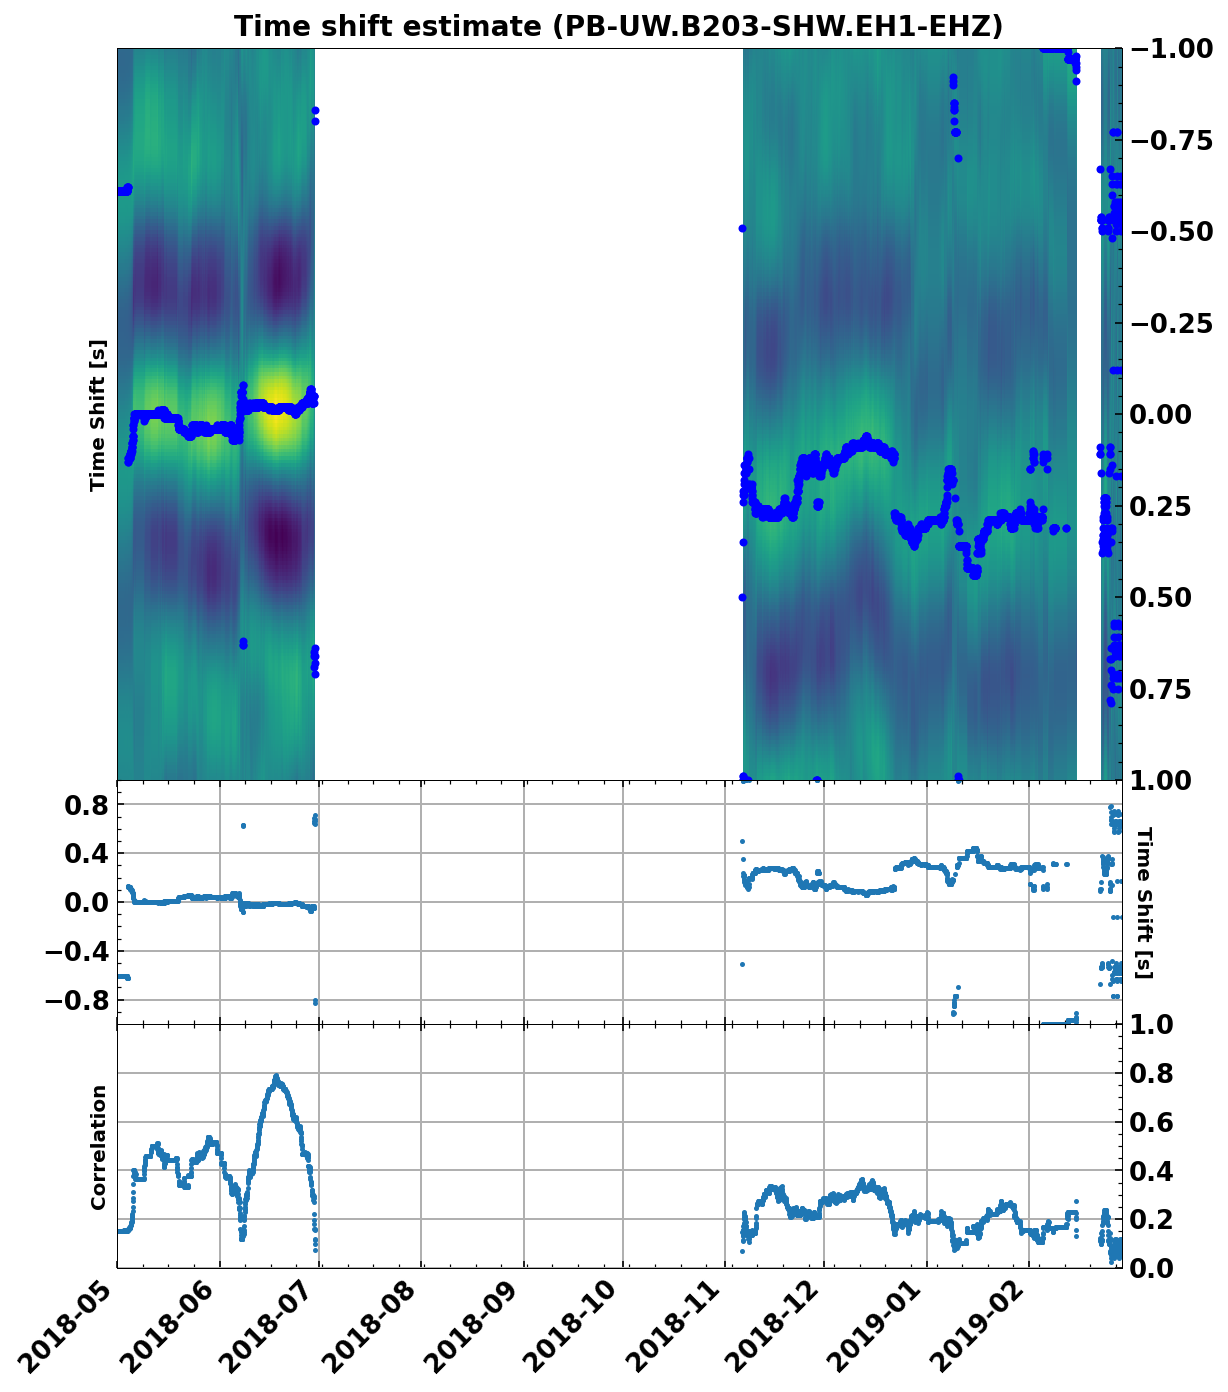

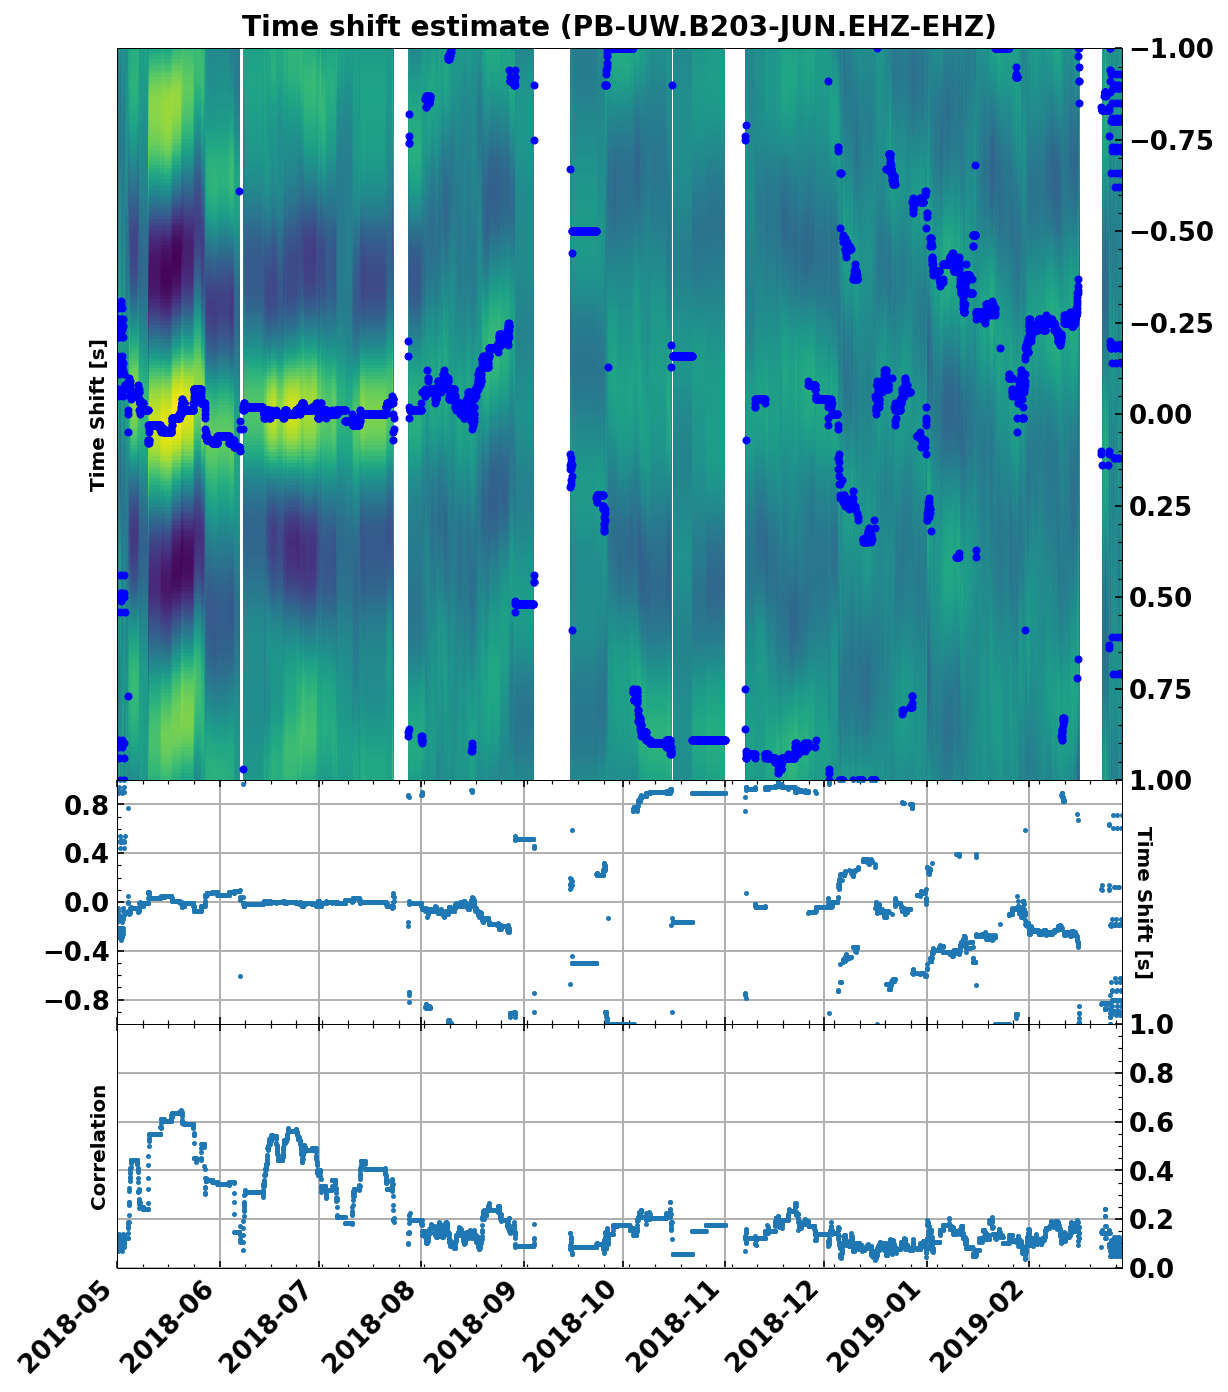

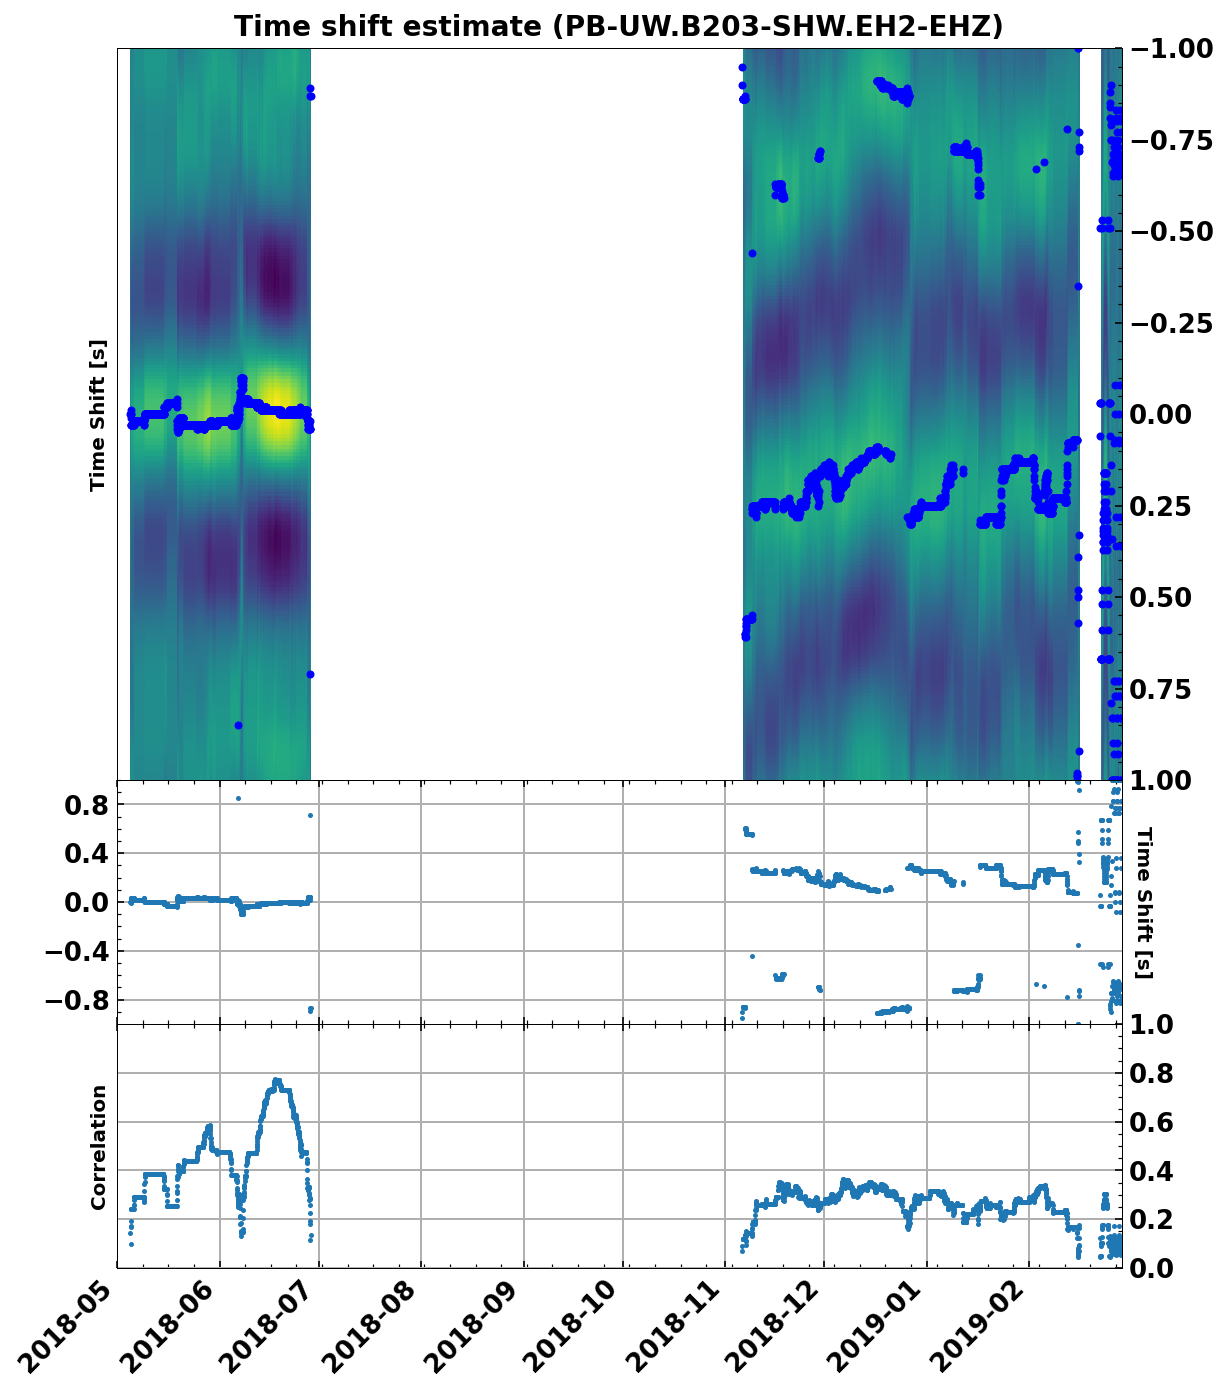

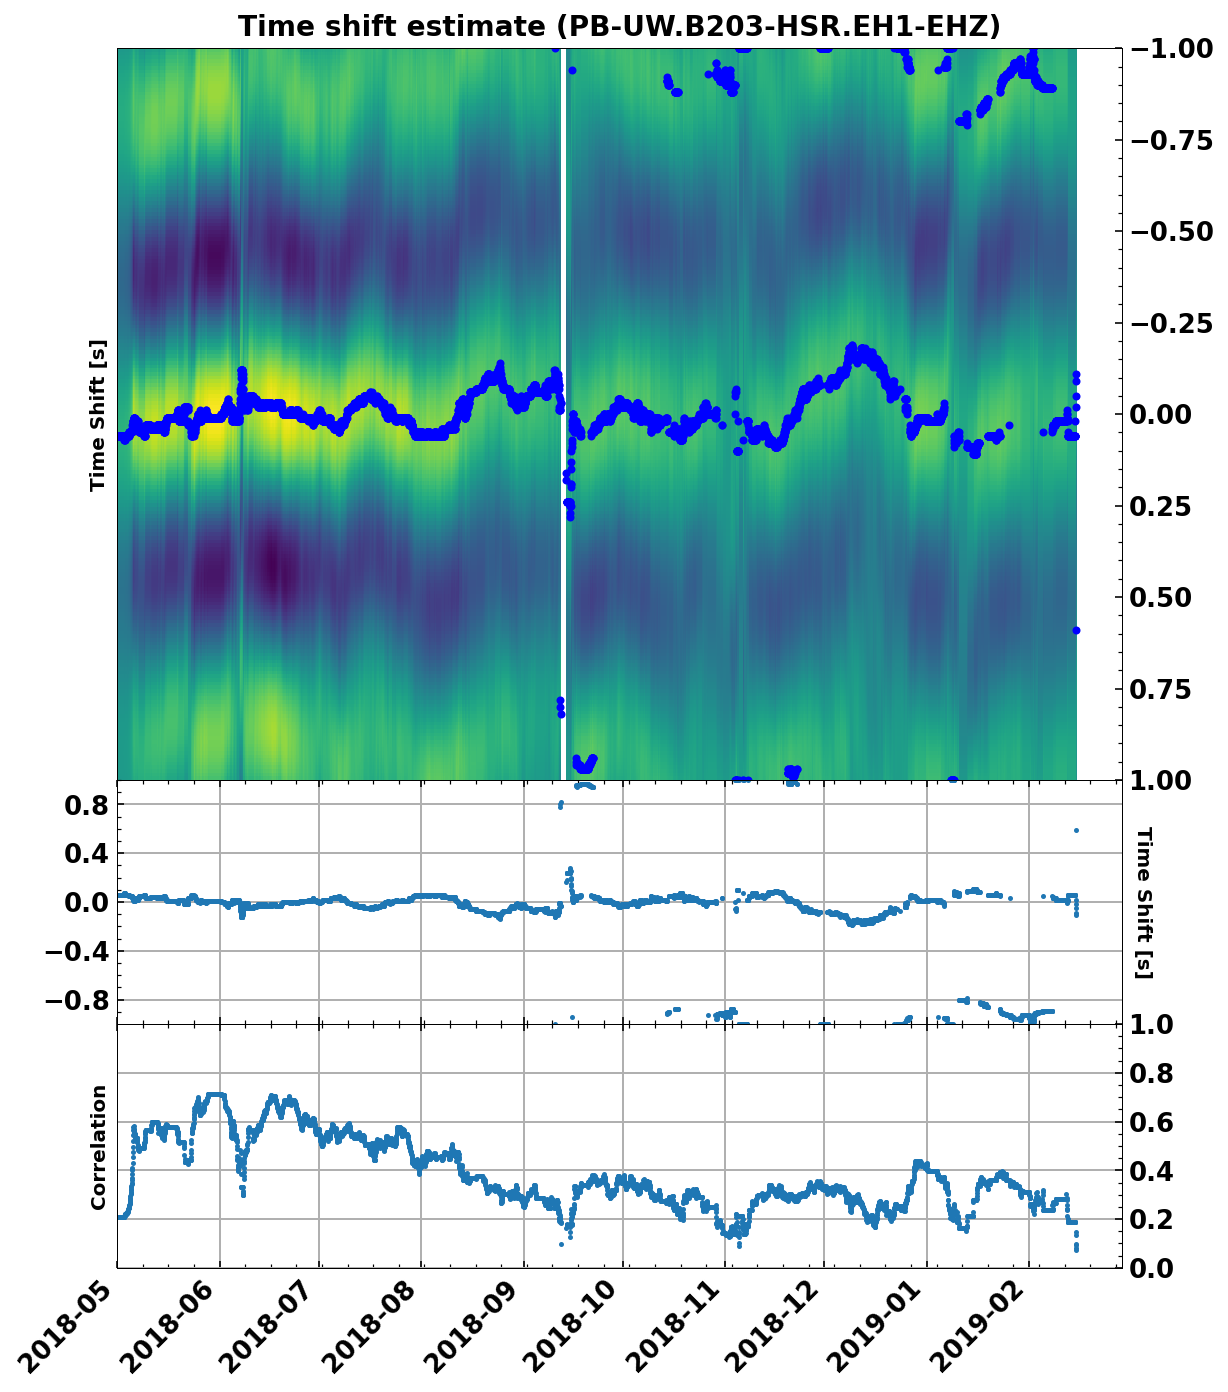

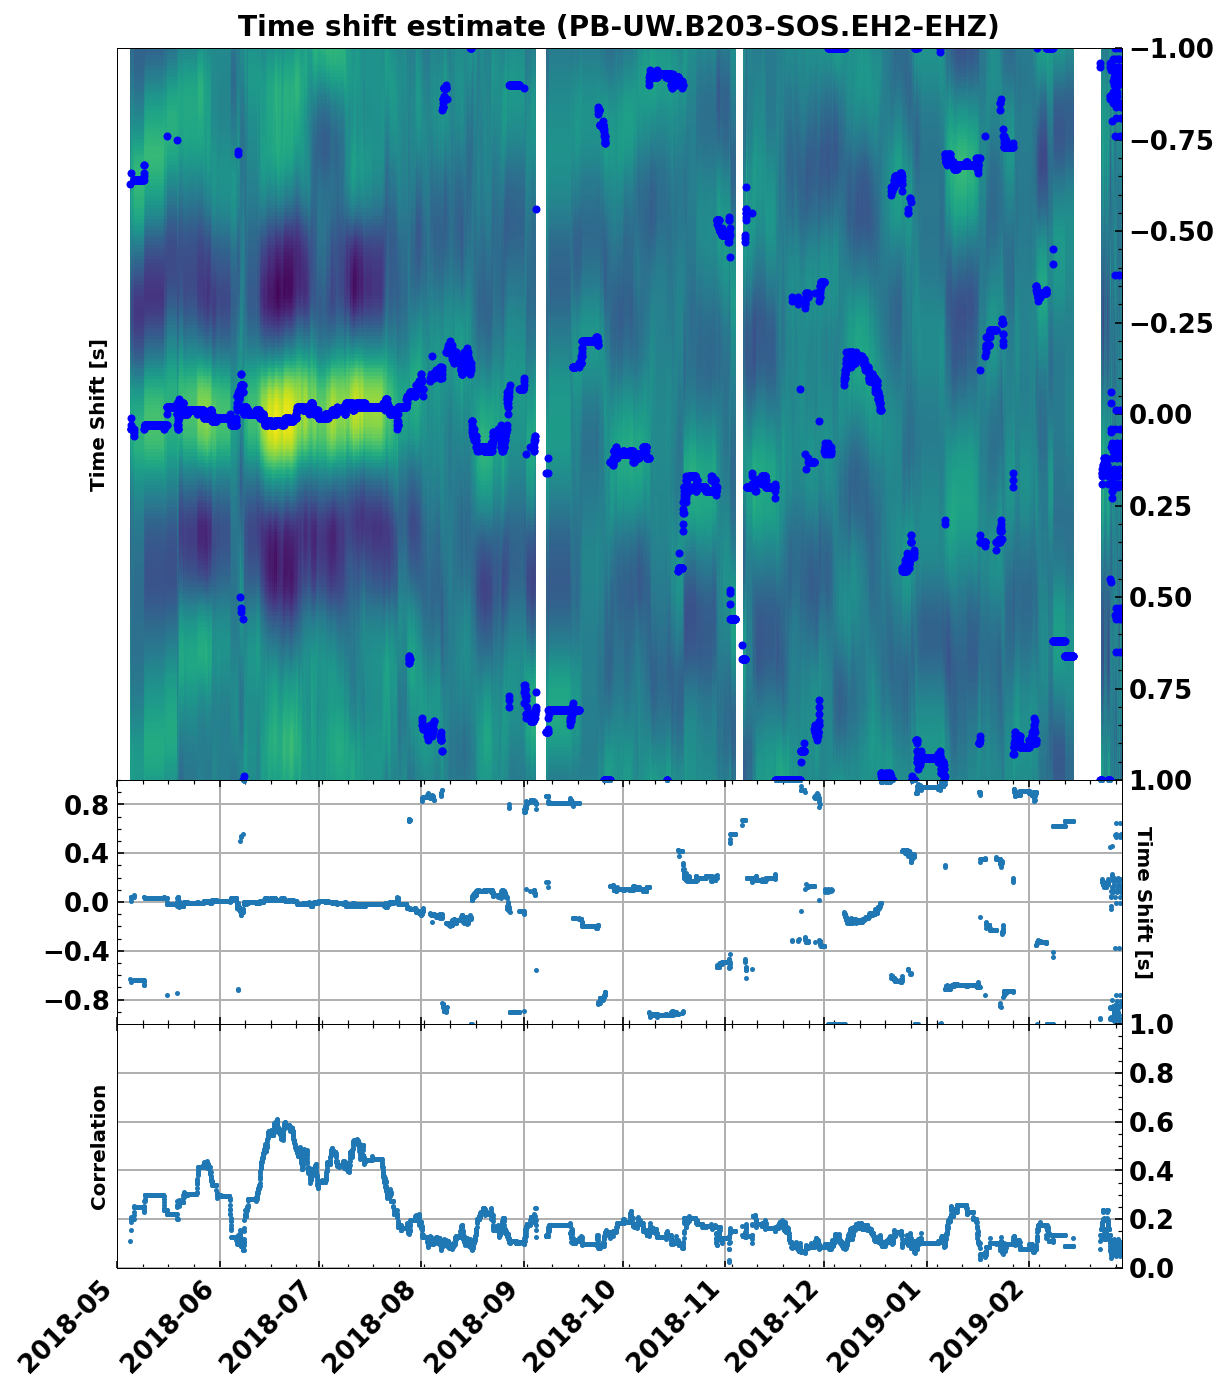

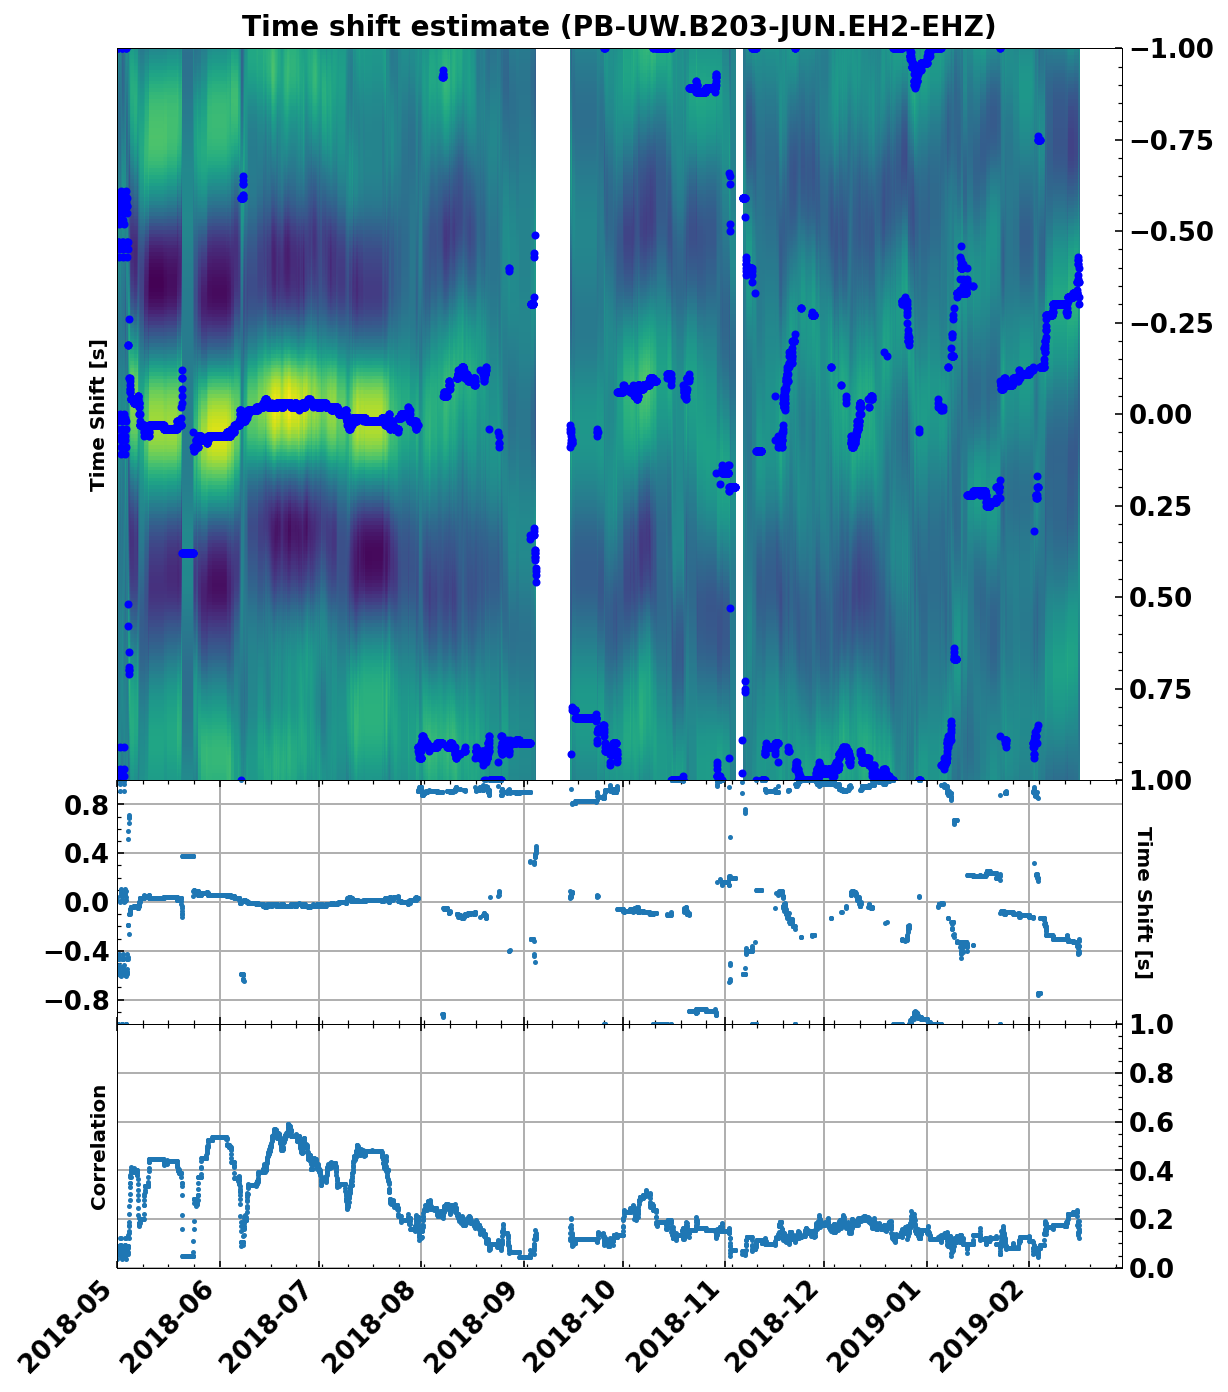

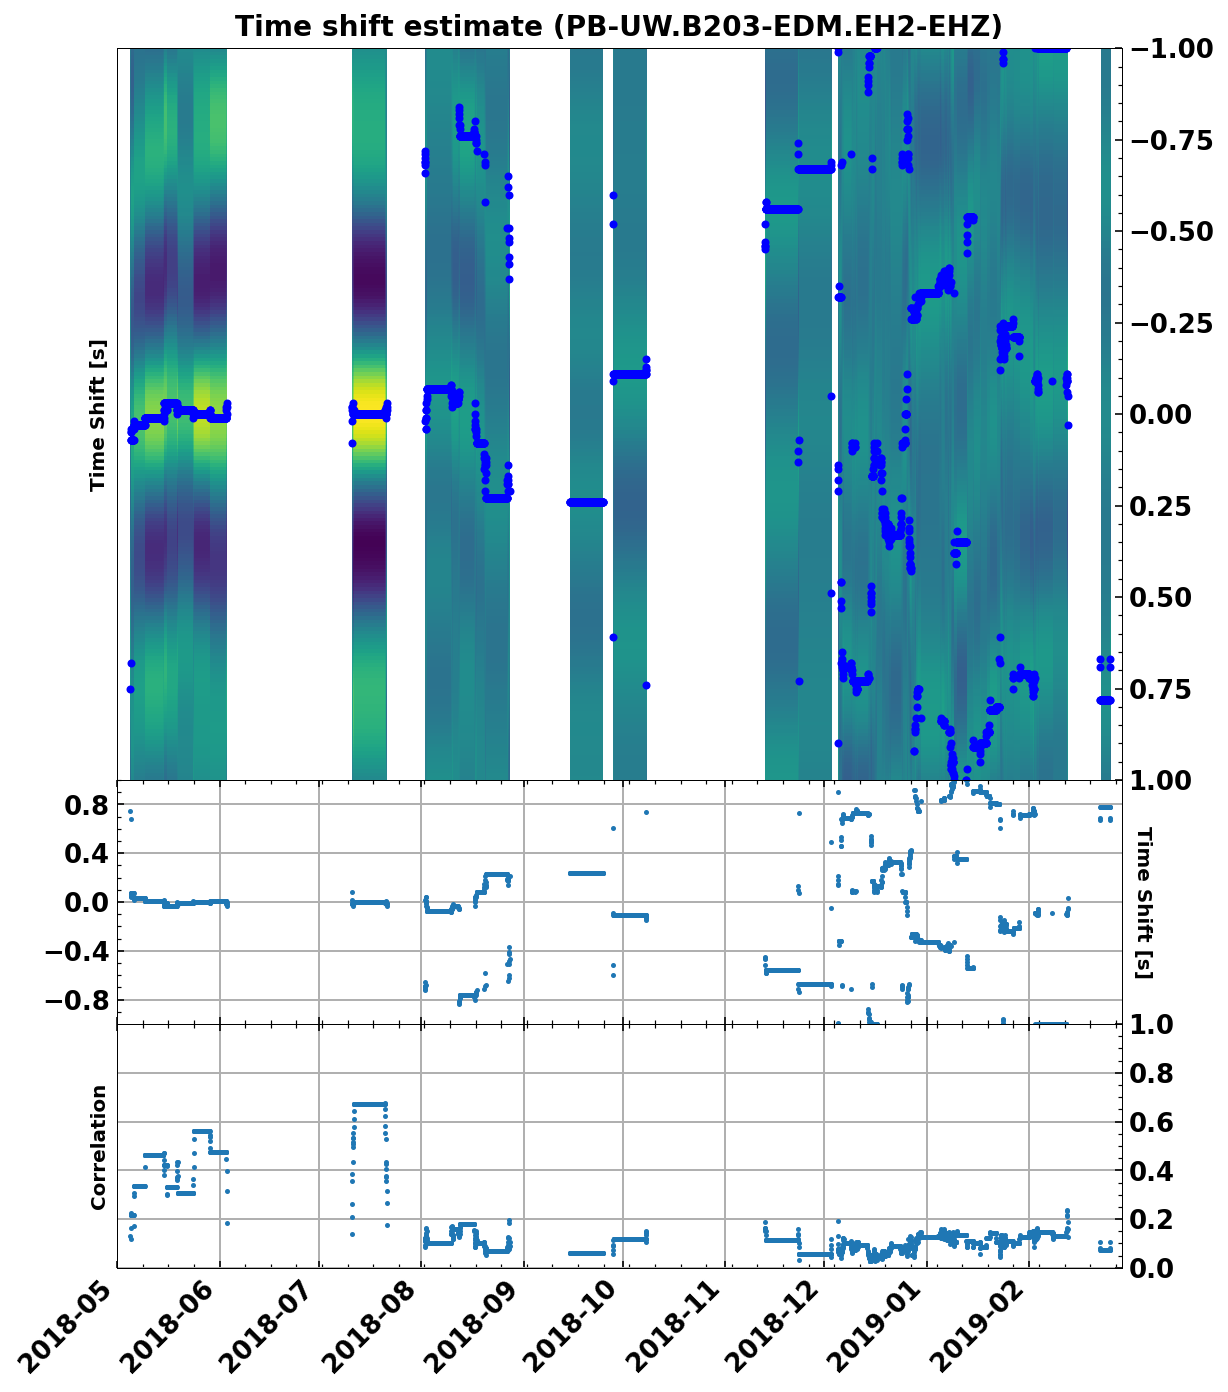

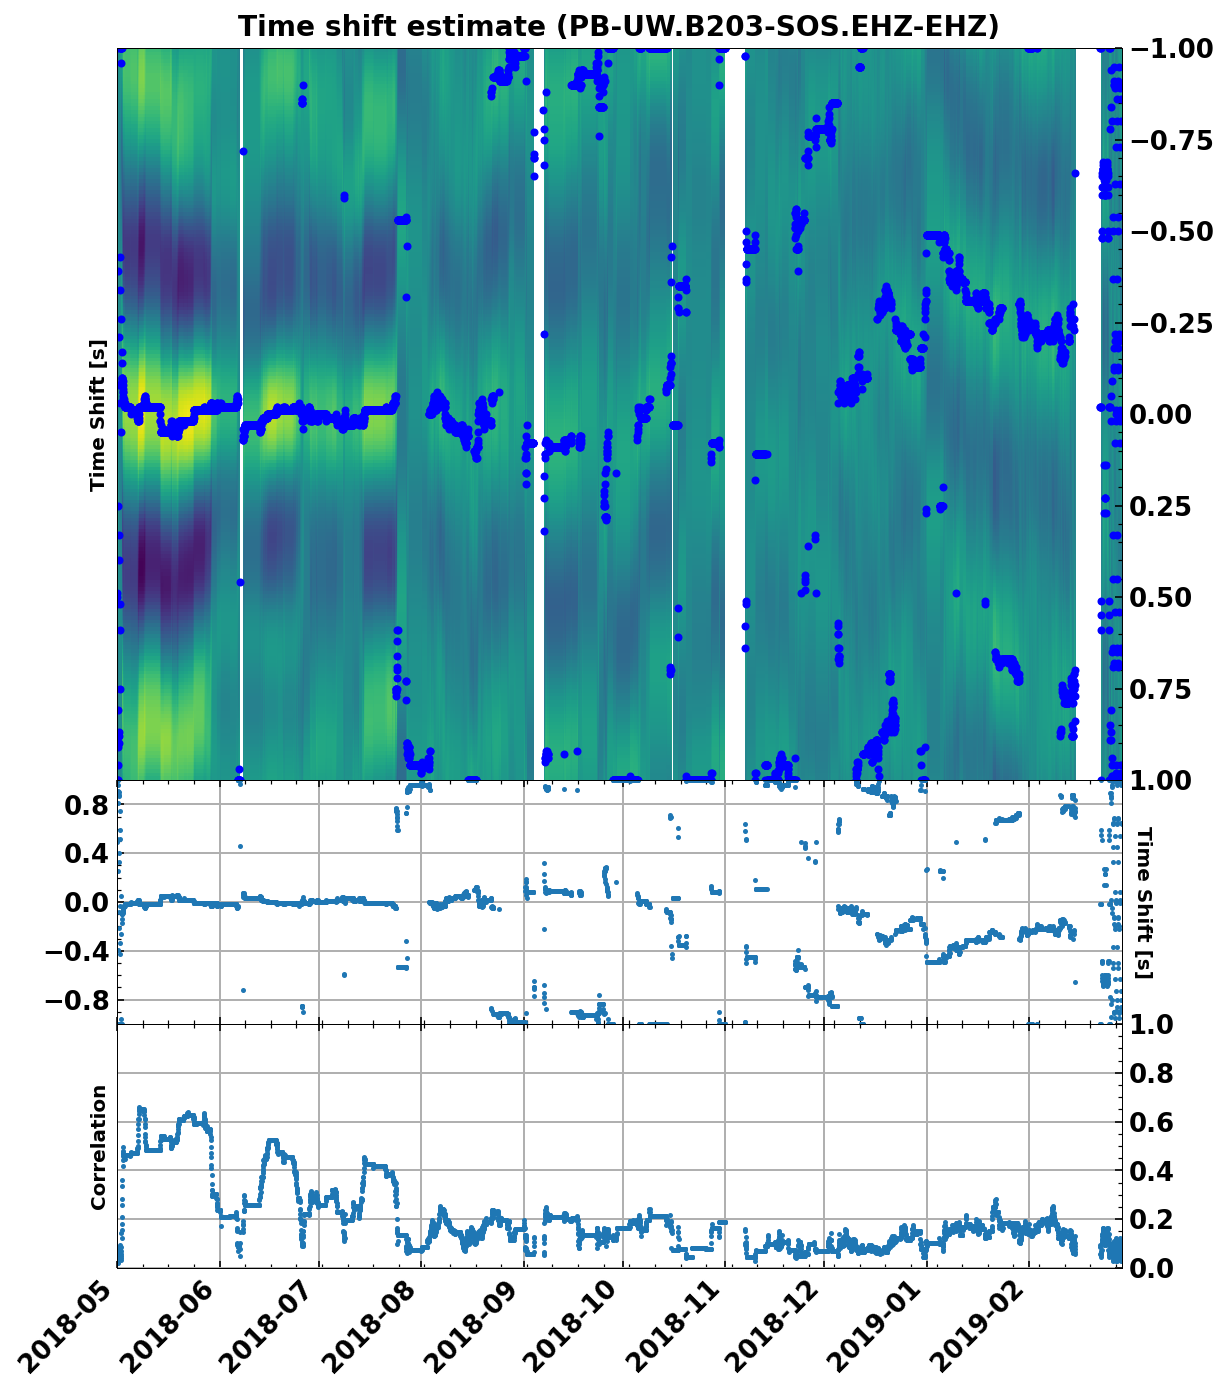

In [23]:
from seismic.monitor.monitor import average_components

dv_av = average_components(dvs, save_scatter=False)

for dv in dvs:
    dv.plot()

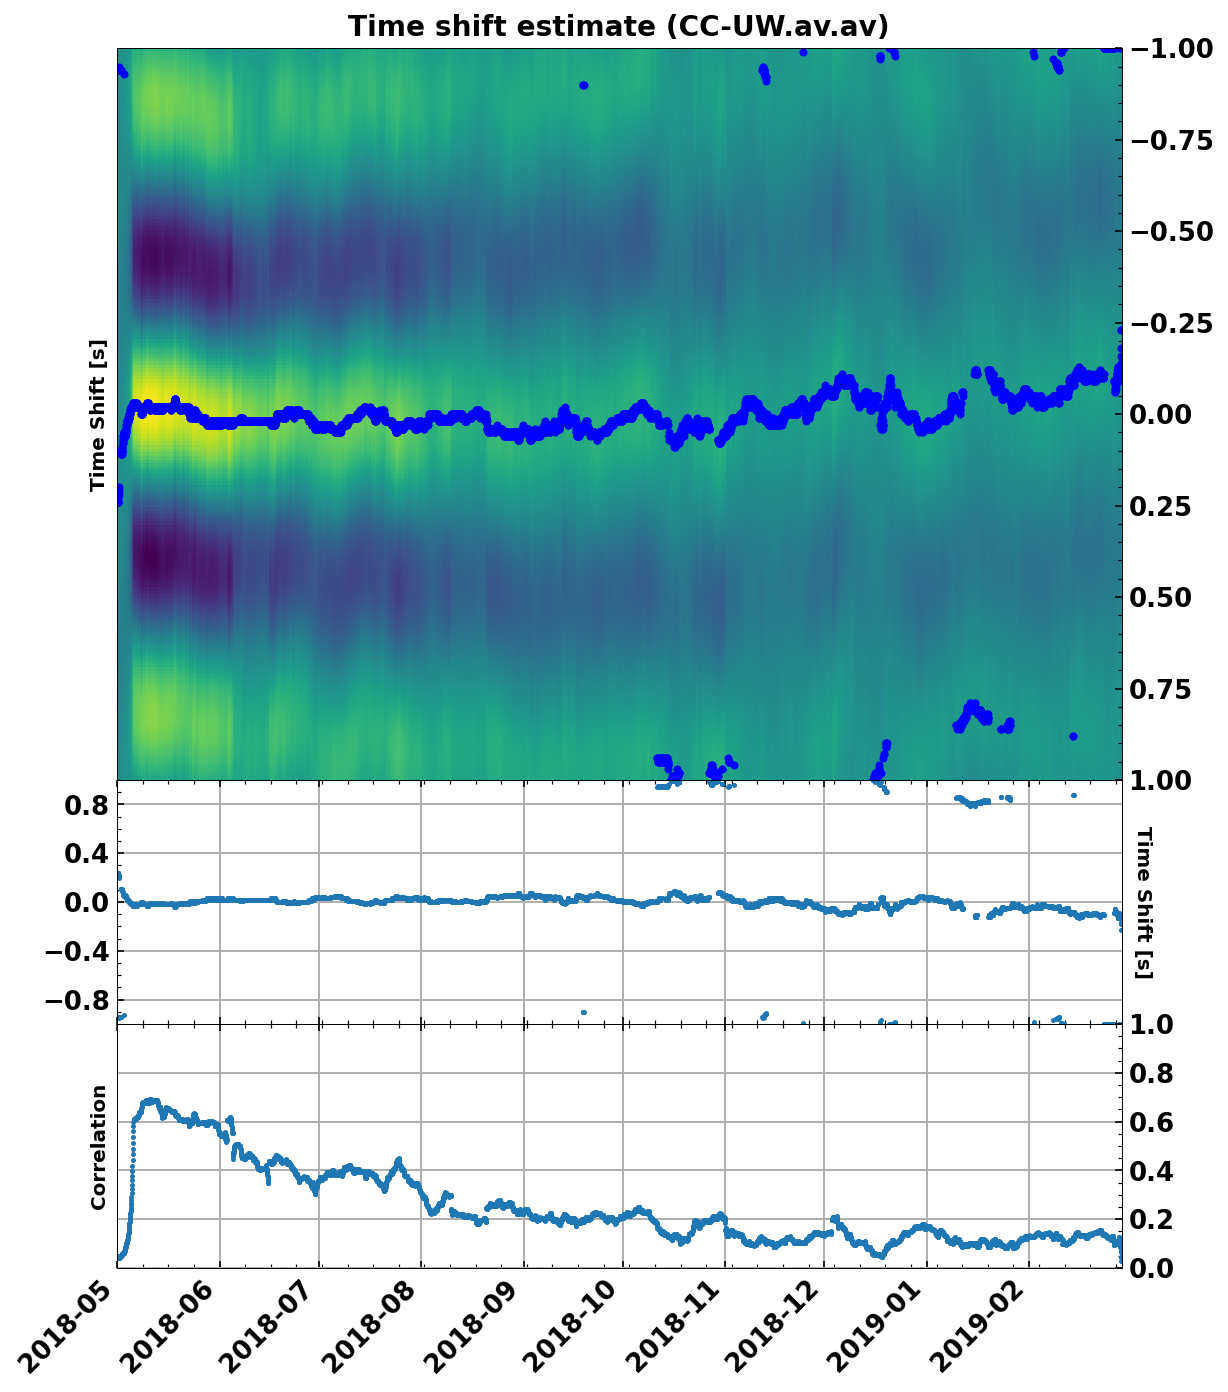

In [12]:
dv_av.plot()

In [13]:
import numpy as np
from obspy import UTCDateTime

start = UTCDateTime(2013, 10, 25)
ii = np.where(np.array(dv_av.stats.corr_start) > start)[0][0]
print(np.nanmean(dv_av.value[ii:]))


-0.026548793859649113


(array([17805., 17812., 17819., 17826., 17836., 17843., 17850., 17857.]),
 [Text(17805.0, 0, '2018-10-01'),
  Text(17812.0, 0, '2018-10-08'),
  Text(17819.0, 0, '2018-10-15'),
  Text(17826.0, 0, '2018-10-22'),
  Text(17836.0, 0, '2018-11-01'),
  Text(17843.0, 0, '2018-11-08'),
  Text(17850.0, 0, '2018-11-15'),
  Text(17857.0, 0, '2018-11-22')])

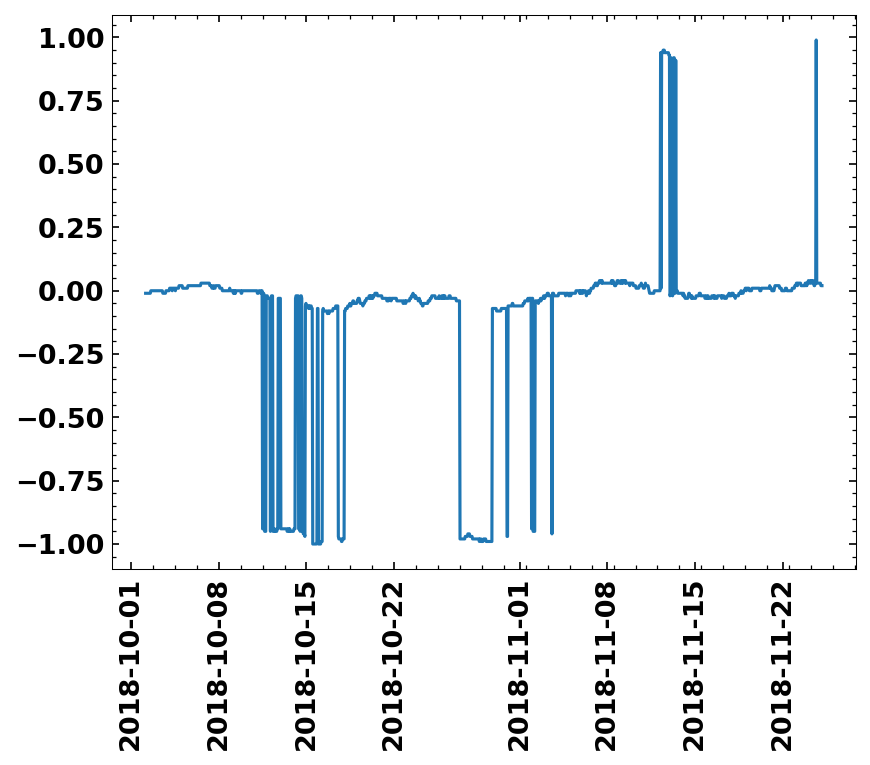

In [14]:
from matplotlib import pyplot as plt
from matplotlib import dates as mdates

# plot first derivative and its maximum to locate the time shift
plt.plot([dt.datetime for dt in dv_av.stats.corr_start[3700:-2300]], dv_av.value[3700:-2300])

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=90)


## Long stacks for amplitudes

120


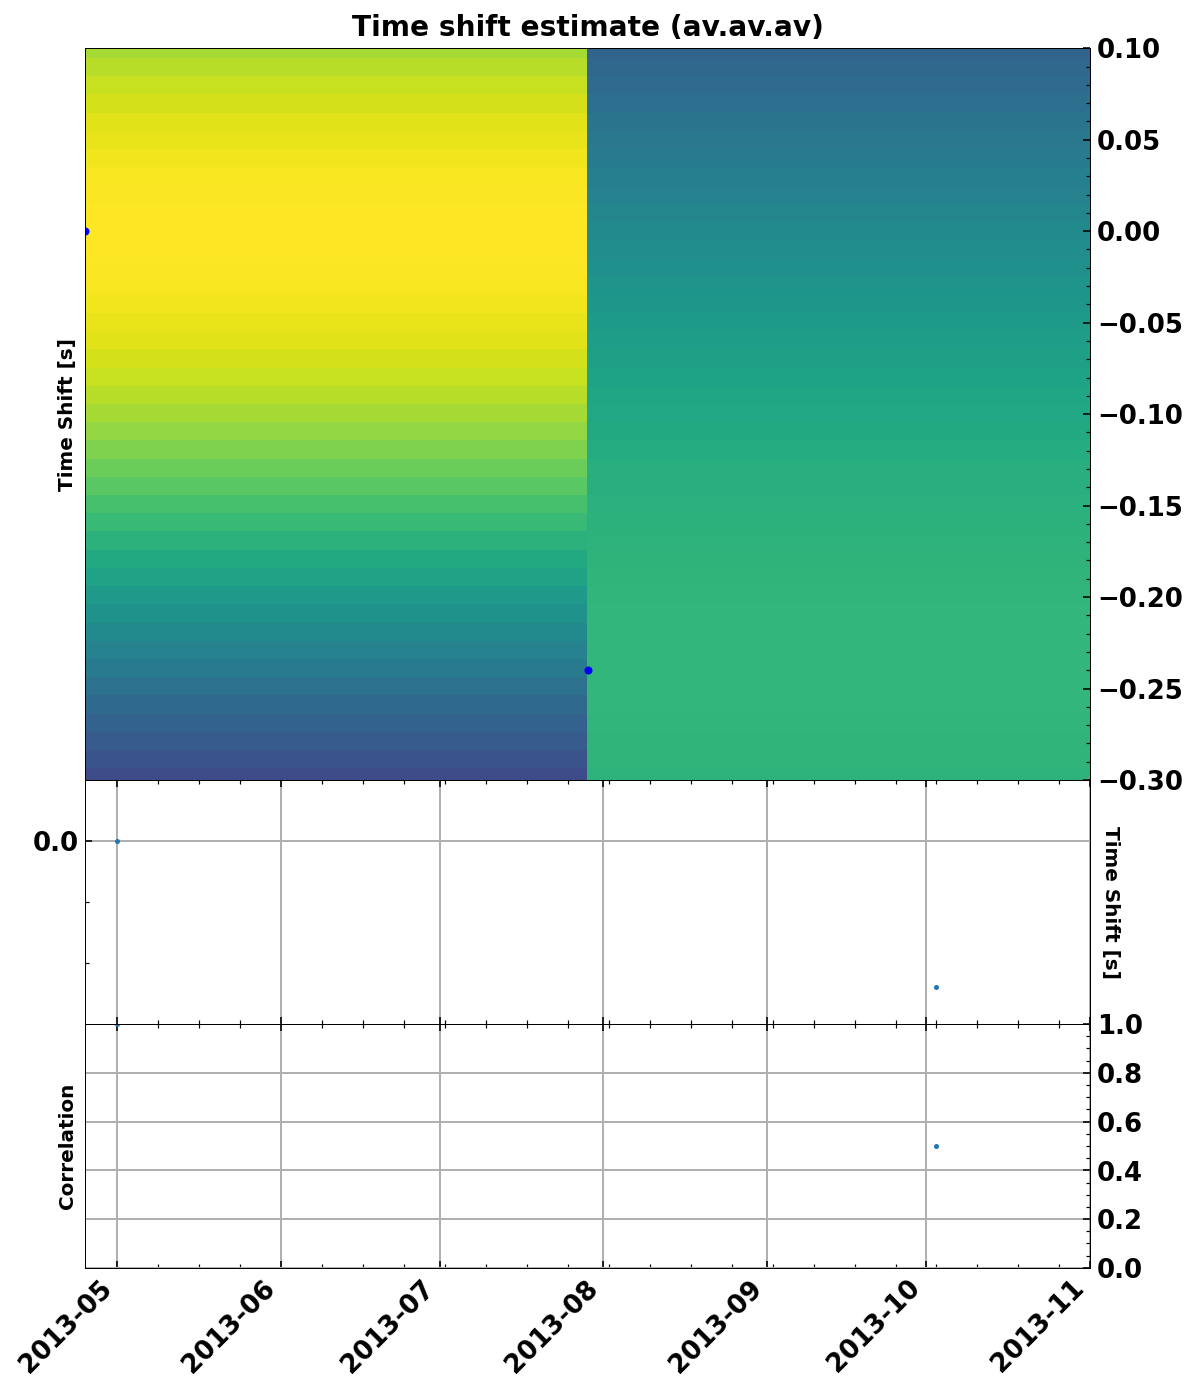

0.24
0.245
0.2494426565142556


In [15]:
from seismic.monitor.dv import read_dv
from seismic.monitor.monitor import average_components


dvs_2pt = read_dv('../time_shift_estimates_twopts*/*')
print(len(dvs_2pt))

dv_av_2pt = average_components(dvs_2pt, save_scatter=False)

# for dv in dvs_2pt:
#     dv.plot()

dv_av_2pt.plot(ylim=(-0.3, 0.1), style='technical', xlim=(UTCDateTime(2013, 4, 25), UTCDateTime(2013, 11, 1)))
print(dv_av_2pt.value[-1])
print(np.median([x.value[-1] for x in dvs_2pt]))
print(np.std([x.value[-1] for x in dvs_2pt]))